Deskripsi Kolom Dataset:
step ⏰: Mewakili satuan waktu di mana 1 langkah setara dengan 1 jam.

type 💳: Jenis transaksi online, misalnya, transfer, payment, debit, atau credit.

amount 💰: Jumlah transaksi yang dilakukan.

nameOrig 👤: Nama pelanggan yang memulai transaksi.

oldbalanceOrg 💳: Saldo sebelum terjadinya transaksi pada akun pelanggan yang memulai.

newbalanceOrig 💳: Saldo setelah terjadinya transaksi pada akun pelanggan yang memulai.

nameDest 🏦: Penerima transaksi.

oldbalanceDest 💳: Saldo awal penerima sebelum terjadinya transaksi.

newbalanceDest 💳: Saldo baru penerima setelah terjadinya transaksi.

isFraud 🚫: Menunjukkan apakah transaksi tersebut merupakan penipuan (fraud) atau tidak.

Dataset ini digunakan untuk melatih model machine learning dalam klasifikasi transaksi penipuan dan transaksi yang tidak fraud 🤖. Setiap baris dalam dataset ini merepresentasikan satu transaksi online dan informasi yang terkandung dalam setiap kolom digunakan untuk memahami jenis transaksi mana yang berpotensi mengarah pada penipuan.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Load Data

In [2]:
df = pd.read_csv('onlinefraud.csv')

# Data Overview

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Breakdown Transaction Type

In [5]:
print(df.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


## Transaction Types Visualization

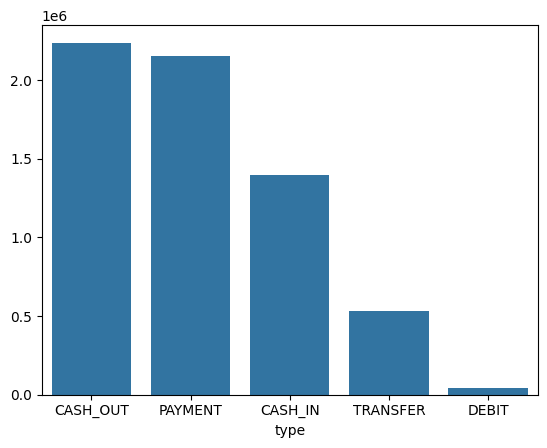

In [6]:
sb.barplot(x = df.type.value_counts().index, y = df.type.value_counts().values)
plt.show()

## Breakdown Transaction Types by isFraud Column

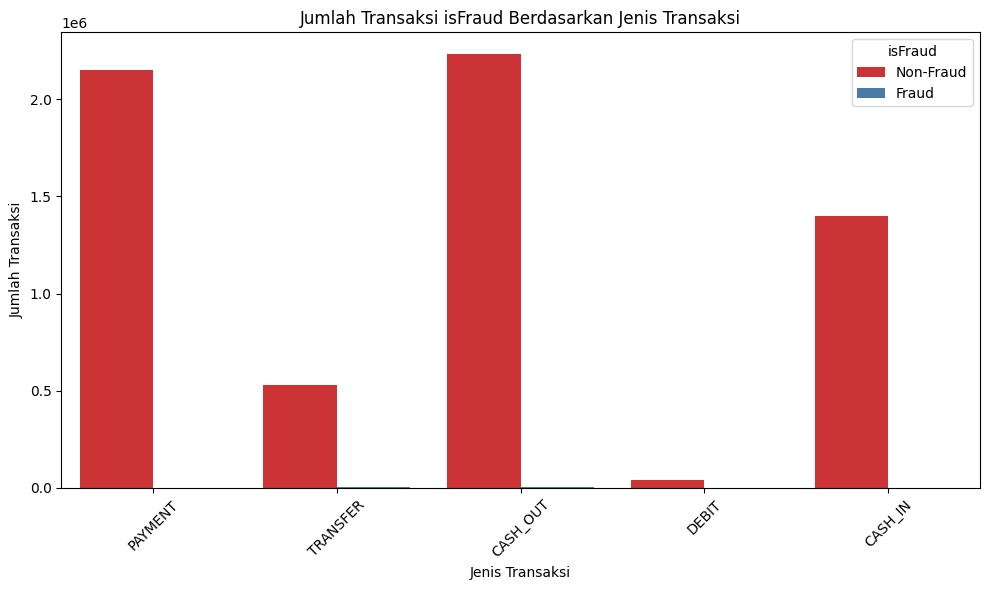

In [7]:
plt.figure(figsize=(10, 6))
sb.countplot(x='type', hue='isFraud', data=df, palette='Set1')

plt.title('Jumlah Transaksi isFraud Berdasarkan Jenis Transaksi')
plt.xlabel('Jenis Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.legend(title='isFraud', loc='upper right', labels=['Non-Fraud', 'Fraud'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check Data Correlation

In [8]:
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
correlation_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


## Heatmap Correlation

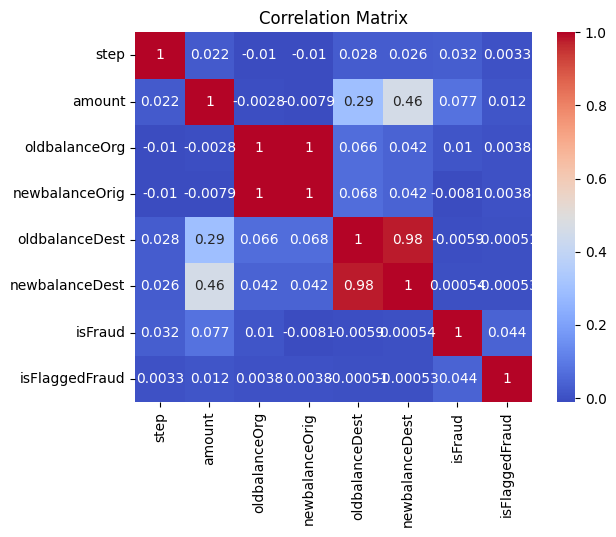

In [9]:
# Create a heatmap using Seaborn's heatmap function
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add a title and labels
plt.title('Correlation Matrix')

# Show the plot
plt.show()

## Breakdown Data Correlation to target (isFraud)

In [10]:
print(correlation_matrix["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [11]:
CrosstabResult=pd.crosstab(index=df.type,columns=df.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Preprocession Data

## Label Encoder

### Before Label Encoder

In [13]:
df.head()

# you can see the type column still in string

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
print(df.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


### Label Encoder

In [15]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

### After Label Encoder

In [16]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [17]:
df.type.value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

## Create Balance Diff column

In [18]:
df['balance_diff'] = df.oldbalanceOrg - df.newbalanceOrig

In [19]:
# Show the dataframe, add one column 'balance_diff'
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14


## Undersampling

### Before Undersampling

total class of 1 and0: isFraud
0    6354407
1       8213
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='isFraud'>

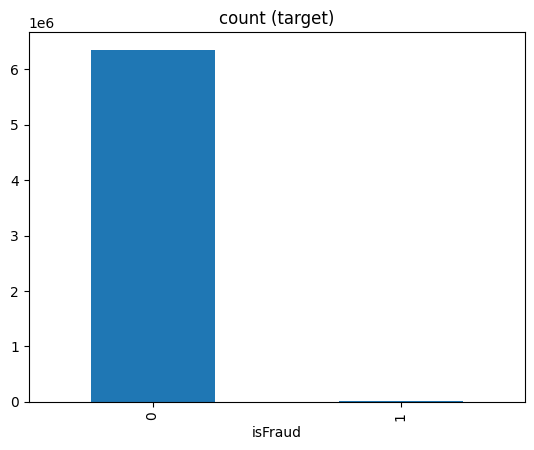

In [20]:
print("total class of 1 and0:",df['isFraud'].value_counts())
df['isFraud'].value_counts().plot(kind='bar', title='count (target)')

### Undersampling

In [21]:
# class count
class_count_0, class_count_1 = df['isFraud'].value_counts()

# Separate class
class_0 = df[df['isFraud'] == 0]
class_1 = df[df['isFraud'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (6354407, 12)
class 1: (8213, 12)


### After Undersampling

total class of 1 and0: isFraud
0    8213
1    8213
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='isFraud'>

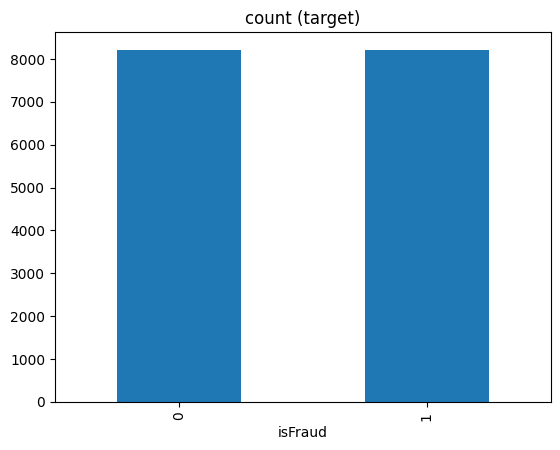

In [22]:
class_0_under = class_0.sample(class_count_1)

balancing_data = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",balancing_data['isFraud'].value_counts())# plot the count after under-sampeling
balancing_data['isFraud'].value_counts().plot(kind='bar', title='count (target)')

# after we run this cell we will use balancing_data dataframe and left df behind

In [23]:
balancing_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
2933227,229,1,351963.12,C1133365325,9078.00,0.00,C1851050926,1037414.26,1389377.38,0,0,9078.00
538530,21,0,200981.38,C1129869098,3608004.04,3808985.42,C2005491909,362060.22,161078.84,0,0,-200981.38
6180183,565,4,106149.21,C824173946,0.00,0.00,C870360818,4752573.09,4858722.30,0,0,0.00
2422299,202,0,24977.45,C1317058059,3634053.94,3659031.39,C352660304,409721.77,384744.32,0,0,-24977.45
5555356,383,3,8577.62,C166945105,10927.00,2349.38,M1124092566,0.00,0.00,0,0,8577.62


In [24]:
balancing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 2933227 to 6362619
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  int32  
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  int64  
 10  isFlaggedFraud  16426 non-null  int64  
 11  balance_diff    16426 non-null  float64
dtypes: float64(6), int32(1), int64(3), object(2)
memory usage: 1.6+ MB


## Split Data X and Y for Training and Testing

In [25]:
X = balancing_data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'balance_diff']].values
y = balancing_data.loc[:,'isFraud'].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
# showing total of x_train and x_test

X_train.shape,X_test.shape

((13140, 5), (3286, 5))

In [28]:
X_train

array([[4.00000000e+00, 2.29933046e+06, 2.29933046e+06, 0.00000000e+00,
        2.29933046e+06],
       [1.00000000e+00, 3.48983860e+05, 3.48983860e+05, 0.00000000e+00,
        3.48983860e+05],
       [4.00000000e+00, 2.57988470e+05, 2.57988470e+05, 0.00000000e+00,
        2.57988470e+05],
       ...,
       [4.00000000e+00, 1.76788602e+06, 1.76788602e+06, 0.00000000e+00,
        1.76788602e+06],
       [4.00000000e+00, 1.00000000e+07, 1.37747461e+07, 3.77474608e+06,
        1.00000000e+07],
       [1.00000000e+00, 9.87145600e+04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

## Scaling Data

### Before Scaling Data

In [29]:
X_train

array([[4.00000000e+00, 2.29933046e+06, 2.29933046e+06, 0.00000000e+00,
        2.29933046e+06],
       [1.00000000e+00, 3.48983860e+05, 3.48983860e+05, 0.00000000e+00,
        3.48983860e+05],
       [4.00000000e+00, 2.57988470e+05, 2.57988470e+05, 0.00000000e+00,
        2.57988470e+05],
       ...,
       [4.00000000e+00, 1.76788602e+06, 1.76788602e+06, 0.00000000e+00,
        1.76788602e+06],
       [4.00000000e+00, 1.00000000e+07, 1.37747461e+07, 3.77474608e+06,
        1.00000000e+07],
       [1.00000000e+00, 9.87145600e+04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

### Scaling Data

In [30]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[2.10243531e+00 8.21297267e+05 1.23402180e+06 5.22889267e+05
 7.11132534e+05]


### After Scaling

In [31]:
X_train

array([[ 1.28213238,  0.79132798,  0.33349864, -0.2116253 ,  0.86061724],
       [-0.74488528, -0.25287308, -0.27706425, -0.2116253 , -0.19624216],
       [ 1.28213238, -0.30159134, -0.30555068, -0.2116253 , -0.245551  ],
       ...,
       [ 1.28213238,  0.50679658,  0.16712808, -0.2116253 ,  0.5726366 ],
       [ 1.28213238,  4.91420916,  3.92591804,  1.31610114,  5.03347808],
       [-0.74488528, -0.38686541, -0.38631488, -0.2116253 , -0.38535053]])

# Machine Learning

## Machine Learning with Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=24)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

## Evaluation Metric

In [34]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9893487522824103

Confusion Matrix:
 [[1602   28]
 [   7 1649]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1630
           1       0.98      1.00      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



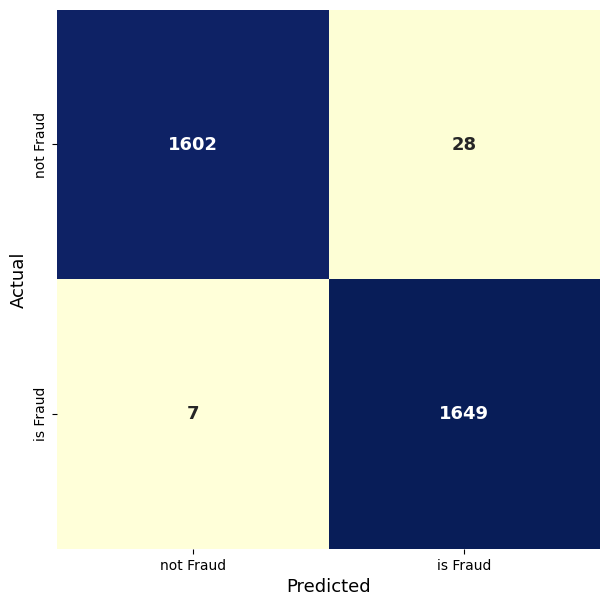

In [35]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (7, 7))

labels = ['not Fraud', 'is Fraud']

sb.heatmap(cm, annot=True, fmt = '.0f', ax = ax, cmap = 'YlGnBu',
            xticklabels = labels, yticklabels = labels,
            cbar = False,
            annot_kws = {
                'fontsize': 13,
                'weight' : 600
            })

plt.xlabel('Predicted', fontsize = 13)
plt.ylabel('Actual', fontsize = 13)

plt.show()

## K-Fold Cross Validation

C:\Users\Aldiva Wibowo\AppData\Local\Temp\ipykernel_4028\3543729761.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sb.barplot(x=scores * 100, y=np.arange(1, k+1), palette=colors, orient='h')


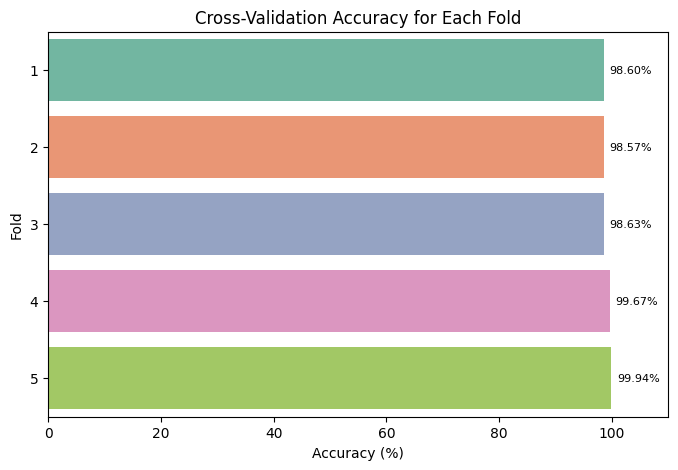

Average accuracy across all folds:
99.08%


In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = rf_classifier

# Define the number of folds (K)
k = 5

# Create a KFold object
kfold = KFold(n_splits=k)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kfold)

# Calculate average accuracy
average_accuracy = np.mean(scores)

# Create a Seaborn horizontal barplot with different colors for each fold
plt.figure(figsize=(8, 5))
colors = sb.color_palette("Set2", k)
bar_plot = sb.barplot(x=scores * 100, y=np.arange(1, k+1), palette=colors, orient='h')

# Add percentage labels inside the bars
for i, score in enumerate(scores):
    plt.text(score * 100 + 1, i, f'{score*100:.2f}%', ha='left', va='center', fontsize=8, color='black')

# Customize the plot
plt.xlabel('Accuracy (%)')
plt.ylabel('Fold')
plt.title('Cross-Validation Accuracy for Each Fold')
plt.xlim(0, 110)  # Set the x-axis range from 0 to 110 for better visualization

# Show the plot
plt.show()

# Print the average accuracy across all folds
print("Average accuracy across all folds:")
print(f"{average_accuracy * 100:.2f}%")

## Feature Importance

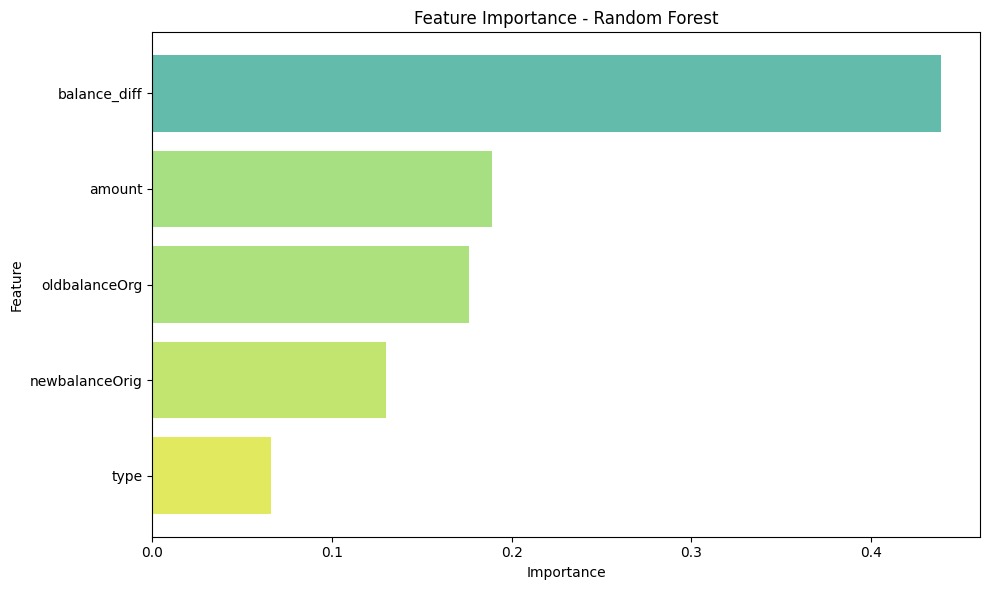

In [37]:
# Obtaining Feature Importances from model
importances = rf_classifier.feature_importances_

selected_columns = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'balance_diff']
X_selected = balancing_data[selected_columns]

# Obtaining Feature Names from DataFrame
feature_names = X_selected.columns

# Creating a DataFrame for Feature Importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sorting the DataFrame based on Importance values in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=True)

# Creating a horizontal bar plot using Matplotlib
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color=plt.cm.viridis_r(feature_importances_df['Importance']))

# Adding labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')

# Adding brighter colors for higher values
for bar in bars:
    bar.set_alpha(0.7)

# Show plot
plt.tight_layout()
plt.show()


## SHAP (SHapley Additive exPlanations)

---
is a method for interpreting machine learning models, explaining their predictions. It provides relative contribution values for each feature towards the prediction of a specific data instance. Essentially, SHAP combines the game theory concept of Shapley Values with machine learning methods to offer consistent and fair model interpretations.

Here's a simplified breakdown of the SHAP calculation process:

1. **Create Explainer Model:**
Use a pre-trained machine learning model.
Create an explainer model tailored to the specific model you want to interpret, like shap.TreeExplainer for tree-based models such as Random Forest or XGBoost.

2. **Compute SHAP Values:**
Calculate SHAP values for each data instance in the dataset.
SHAP values measure the relative contribution of each feature to the prediction. Positive values indicate contributions that increase the prediction, while negative values indicate contributions that decrease the prediction.

3. **Generate Plots:**
Once SHAP values are computed, you can create various plots to aid in understanding feature contributions to predictions.
Commonly used plots include summary plots, force plots, and dependence plots.

In [38]:
import shap

print('Shap ver:', shap.__version__)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Shap ver: 0.43.0


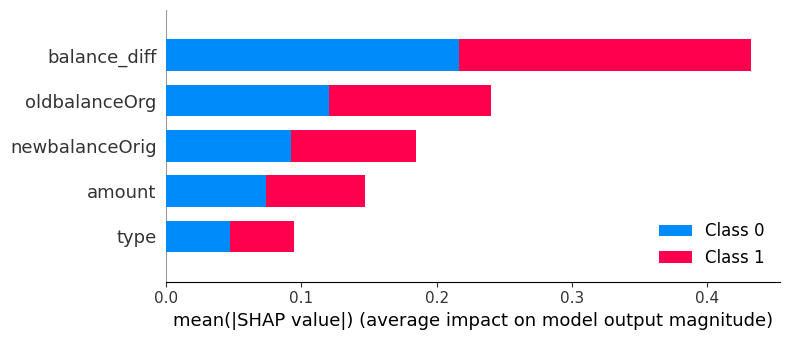

In [39]:
feature_names = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'balance_diff']

explainer = shap.TreeExplainer(rf_classifier, feature_names=feature_names)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

## Chi-Square

In [40]:
import numpy as np
from scipy.stats import chi2
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# SHAP values
explainer = shap.TreeExplainer(rf_classifier, feature_names=feature_names)
shap_values = explainer.shap_values(X_test)

# Calculate Chi-square for each feature
for feature_index in range(len(feature_names)):
    shap_feature_values = [shap_value[feature_index] for shap_value in shap_values]

    # Calculate observed and expected values for Chi-square
    observed_values, _ = np.histogram(shap_feature_values, bins='auto')
    expected_values = np.ones_like(observed_values) * len(shap_feature_values) / len(observed_values)

    # Calculate Chi-square statistic
    chi2_stat = np.sum((observed_values - expected_values)**2 / expected_values)

    # Calculate p-value
    p_val = 1 - chi2.cdf(chi2_stat, df=len(observed_values)-1)

    print(f"\nChi-square Statistic for {feature_names[feature_index]}:")
    print(f"Chi-square Statistic: {chi2_stat}")
    print(f"P-value: {p_val:.15f}")  # Adjust the precision as needed


Chi-square Statistic for type:
Chi-square Statistic: 92.0
P-value: 0.000000000000001

Chi-square Statistic for amount:
Chi-square Statistic: 67.0
P-value: 0.000000000000097

Chi-square Statistic for oldbalanceOrg:
Chi-square Statistic: 48.0
P-value: 0.000000003551923

Chi-square Statistic for newbalanceOrig:
Chi-square Statistic: 47.0
P-value: 0.000000001524915

Chi-square Statistic for balance_diff:
Chi-square Statistic: 32.00000000000001
P-value: 0.000001913097970


## Test for Ratios Data

Train-test split ratio: 0.6:0.4
Accuracy: 0.9916
Precision: 0.9878
Recall: 0.9954
F1 Score: 0.9916
Confusion Matrix:
[[3268   40]
 [  15 3248]]


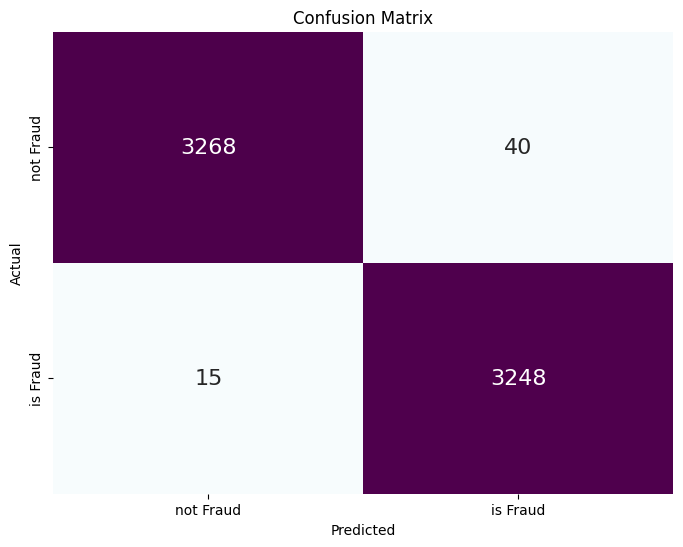

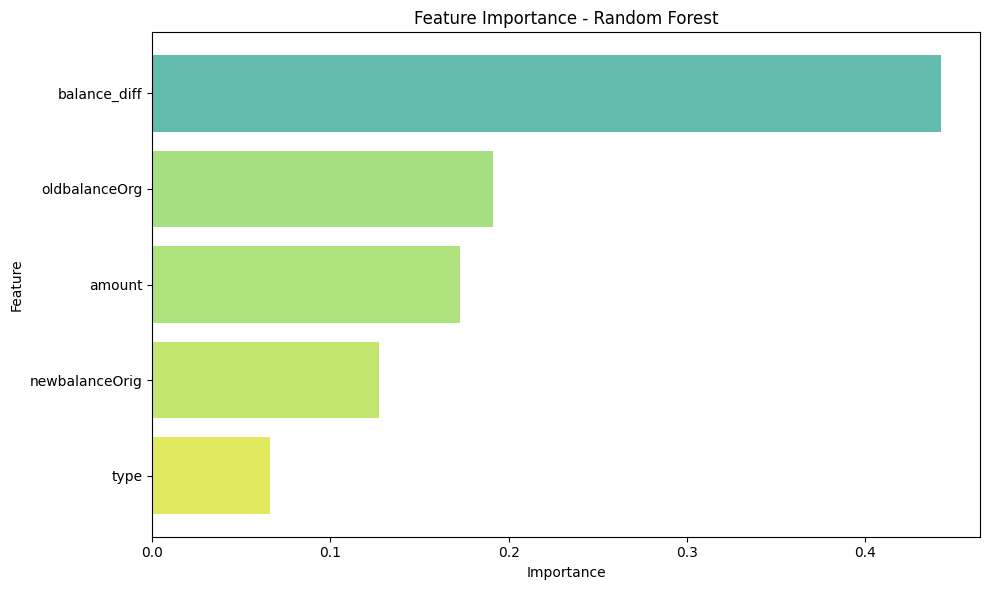

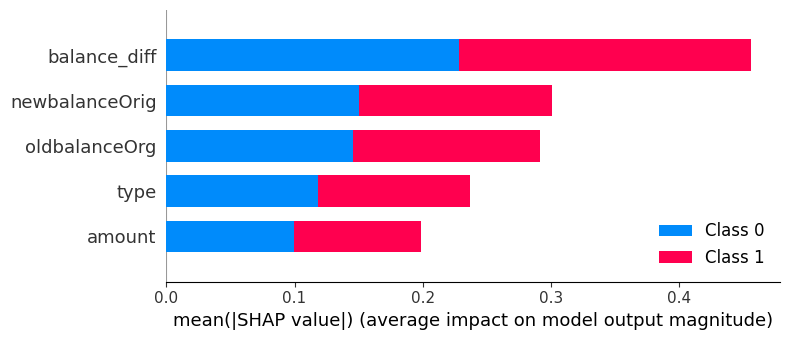


Chi-square Statistic for type:
Chi-square Statistic: 47.00000000000001
P-value: 0.000000001524915

Chi-square Statistic for amount:
Chi-square Statistic: 47.00000000000001
P-value: 0.000000001524915

Chi-square Statistic for oldbalanceOrg:
Chi-square Statistic: 47.0
P-value: 0.000000001524915

Chi-square Statistic for newbalanceOrig:
Chi-square Statistic: 47.0
P-value: 0.000000001524915

Chi-square Statistic for balance_diff:
Chi-square Statistic: 47.00000000000001
P-value: 0.000000001524915
Train-test split ratio: 0.7:0.3
Accuracy: 0.9913
Precision: 0.9863
Recall: 0.9963
F1 Score: 0.9913
Confusion Matrix:
[[2445   34]
 [   9 2440]]


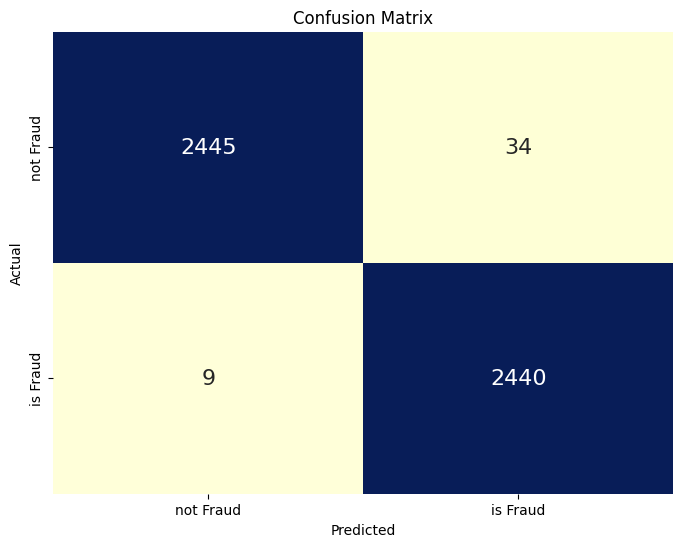

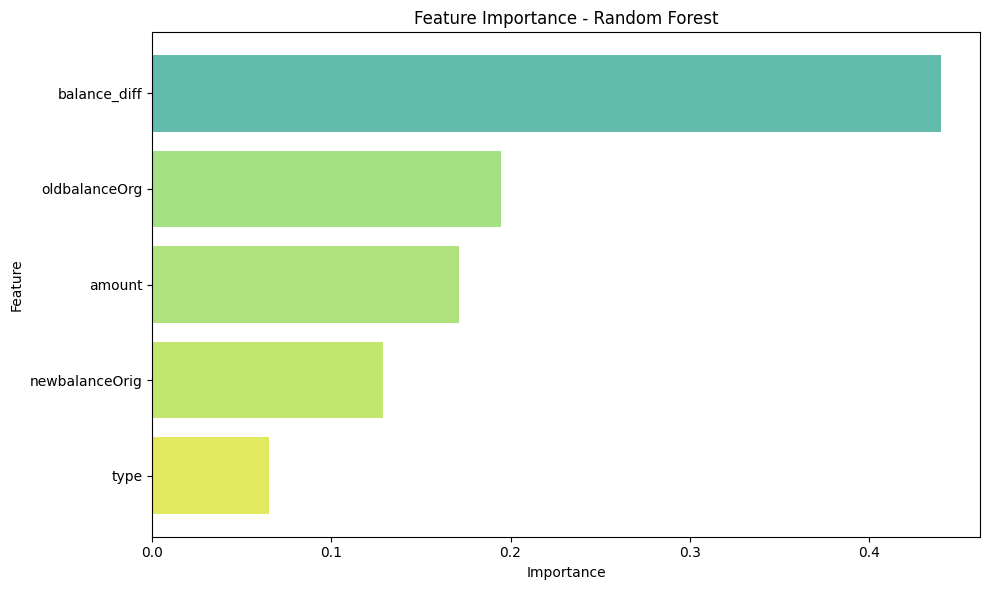

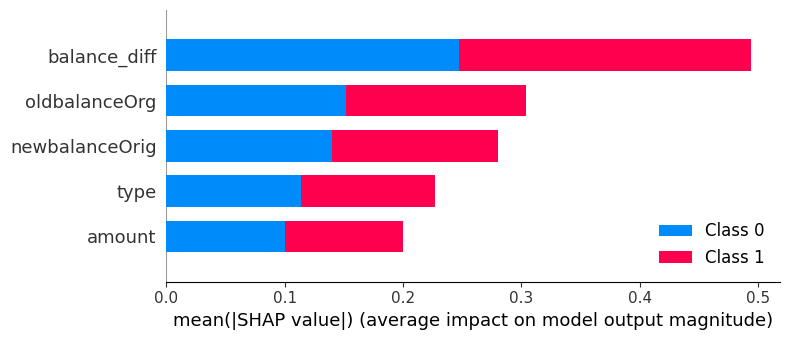


Chi-square Statistic for type:
Chi-square Statistic: 47.00000000000001
P-value: 0.000000001524915

Chi-square Statistic for amount:
Chi-square Statistic: 47.00000000000001
P-value: 0.000000001524915

Chi-square Statistic for oldbalanceOrg:
Chi-square Statistic: 42.00000000000001
P-value: 0.000000016681633

Chi-square Statistic for newbalanceOrig:
Chi-square Statistic: 42.00000000000001
P-value: 0.000000016681633

Chi-square Statistic for balance_diff:
Chi-square Statistic: 47.00000000000001
P-value: 0.000000001524915
Train-test split ratio: 0.8:0.2
Accuracy: 0.9921
Precision: 0.9873
Recall: 0.9969
F1 Score: 0.9921
Confusion Matrix:
[[1628   21]
 [   5 1632]]


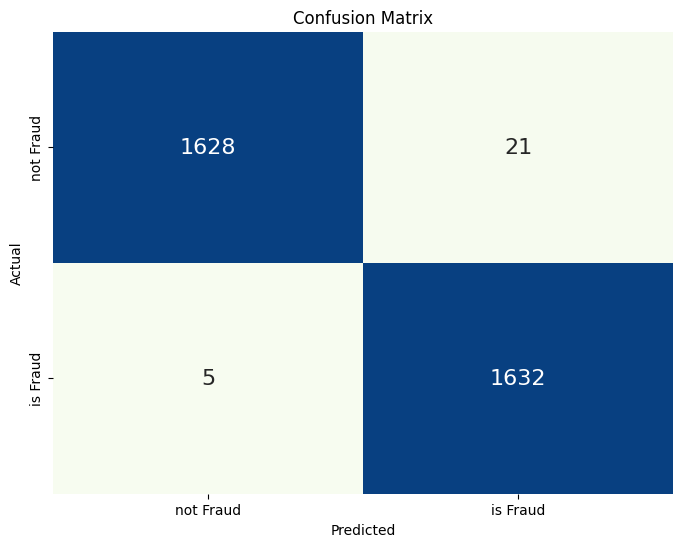

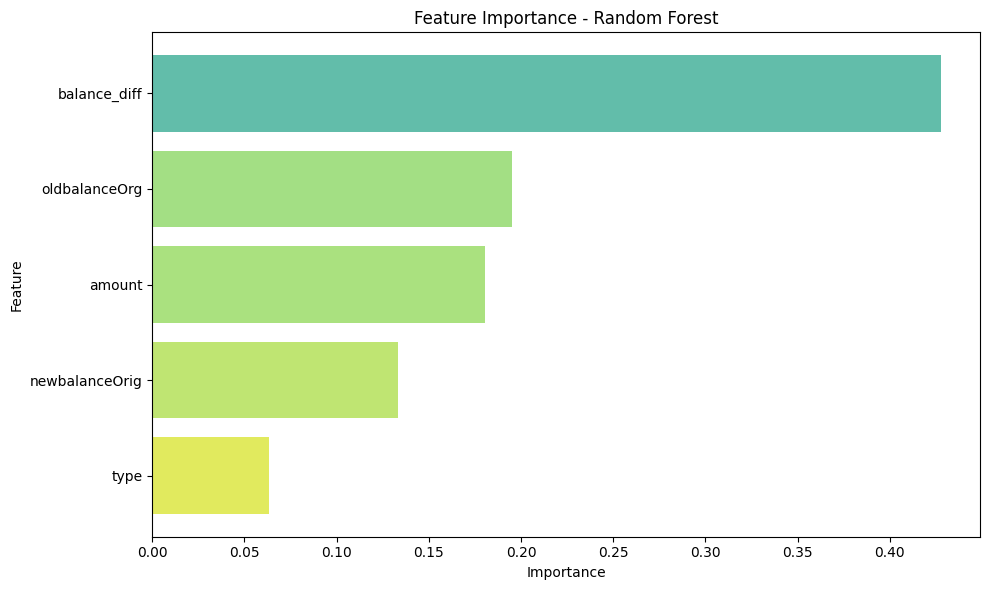

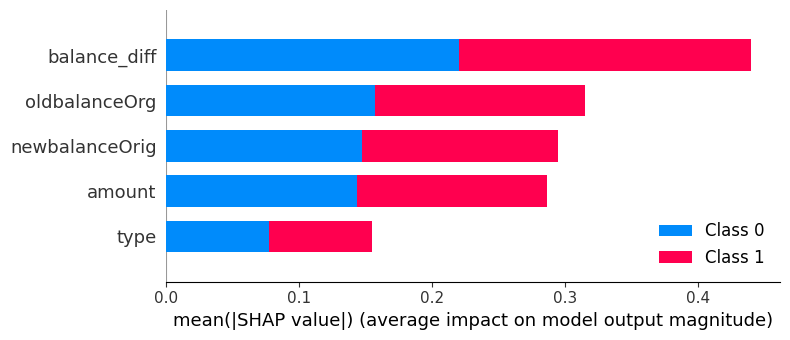


Chi-square Statistic for type:
Chi-square Statistic: 47.00000000000001
P-value: 0.000000001524915

Chi-square Statistic for amount:
Chi-square Statistic: 47.00000000000001
P-value: 0.000000001524915

Chi-square Statistic for oldbalanceOrg:
Chi-square Statistic: 47.0
P-value: 0.000000001524915

Chi-square Statistic for newbalanceOrig:
Chi-square Statistic: 47.0
P-value: 0.000000001524915

Chi-square Statistic for balance_diff:
Chi-square Statistic: 67.0
P-value: 0.000000000000097


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import shap
import numpy as np
from scipy.stats import chi2

# Assuming you already have X and y from your dataframe

# Define the different train-test split ratios and corresponding color palettes
ratios_and_palettes = [((0.6, 0.4), "BuPu"), ((0.7, 0.3), "YlGnBu"), ((0.8, 0.2), "GnBu")]

for (train_ratio, test_ratio), color_palette in ratios_and_palettes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)

    # Scale the data using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the Random Forest Classifier
    rf_classifier = RandomForestClassifier(random_state=42)

    # Fit the model on the scaled training data
    rf_classifier.fit(X_train_scaled, y_train)

    # Make predictions on the scaled test data
    y_pred = rf_classifier.predict(X_test_scaled)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results
    print(f"Train-test split ratio: {train_ratio}:{test_ratio}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    labels = ['not Fraud', 'is Fraud']
    # Plot Confusion Matrix with a different color palette
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=color_palette, cbar=False, annot_kws={"size": 16}, xticklabels = labels, yticklabels = labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Feature Importance
    importances = rf_classifier.feature_importances_
    selected_columns = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'balance_diff']
    X_selected = balancing_data[selected_columns]
    feature_names = X_selected.columns
    feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=True)

    # Plot Feature Importance
    plt.figure(figsize=(10, 6))
    bars = plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color=plt.cm.viridis_r(feature_importances_df['Importance']))
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance - Random Forest')
    for bar in bars:
        bar.set_alpha(0.7)
    plt.tight_layout()
    plt.show()

    # SHAP Values
    explainer = shap.TreeExplainer(rf_classifier, feature_names=feature_names)
    shap_values = explainer.shap_values(X_test)

    # SHAP summary plot
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)

    # Chi-square Analysis
    for feature_index in range(len(feature_names)):
        shap_feature_values = [shap_value[feature_index] for shap_value in shap_values]

        # Calculate observed and expected values for Chi-square
        observed_values, _ = np.histogram(shap_feature_values, bins='auto')
        expected_values = np.ones_like(observed_values) * len(shap_feature_values) / len(observed_values)

        # Calculate Chi-square statistic
        chi2_stat = np.sum((observed_values - expected_values)**2 / expected_values)

        # Calculate p-value
        p_val = 1 - chi2.cdf(chi2_stat, df=len(observed_values)-1)

        print(f"\nChi-square Statistic for {feature_names[feature_index]}:")
        print(f"Chi-square Statistic: {chi2_stat}")
        print(f"P-value: {p_val:.15f}")  # Adjust the precision as needed

    print("="*50)
